In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [2]:
# Calling DataFrame constructor
df = pd.read_csv("SBL.csv")
df

,Date,Close,High,Low,Open,Qty,Turnover
0,7/30/2014,883.0,895.0,865.0,870.0,13794.0,9133539.0
1,8/1/2014,870.0,887.0,870.0,881.0,5964.0,9133539.0
2,8/2/2014,881.0,900.0,880.0,865.0,10172.0,9133539.0
3,8/3/2014,851.0,870.0,850.0,860.0,11684.0,9133539.0
4,8/4/2014,835.0,851.0,825.0,851.0,10907.0,9133539.0
...,...,...,...,...,...,...,...
2116,7/17/2024,290.9,293.0,285.0,293.0,101992.0,29457246.8
2117,7/18/2024,306.0,315.0,285.5,293.0,243614.0,74041890.5
2118,7/21/2024,316.9,318.2,294.1,306.0,240175.0,74508533.7
2119,7/22/2024,309.4,322.0,304.0,322.0,163946.0,50841576.9


In [3]:
#Get the number of rows and columns in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2121 non-null   object 
 1   Close     2121 non-null   float64
 2   High      2121 non-null   float64
 3   Low       2121 non-null   float64
 4   Open      2121 non-null   float64
 5   Qty       2121 non-null   float64
 6   Turnover  2121 non-null   float64
dtypes: float64(6), object(1)
memory usage: 116.1+ KB


In [4]:
df = df.dropna()

In [5]:
df

,Date,Close,High,Low,Open,Qty,Turnover
0,7/30/2014,883.0,895.0,865.0,870.0,13794.0,9133539.0
1,8/1/2014,870.0,887.0,870.0,881.0,5964.0,9133539.0
2,8/2/2014,881.0,900.0,880.0,865.0,10172.0,9133539.0
3,8/3/2014,851.0,870.0,850.0,860.0,11684.0,9133539.0
4,8/4/2014,835.0,851.0,825.0,851.0,10907.0,9133539.0
...,...,...,...,...,...,...,...
2116,7/17/2024,290.9,293.0,285.0,293.0,101992.0,29457246.8
2117,7/18/2024,306.0,315.0,285.5,293.0,243614.0,74041890.5
2118,7/21/2024,316.9,318.2,294.1,306.0,240175.0,74508533.7
2119,7/22/2024,309.4,322.0,304.0,322.0,163946.0,50841576.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2121 non-null   object 
 1   Close     2121 non-null   float64
 2   High      2121 non-null   float64
 3   Low       2121 non-null   float64
 4   Open      2121 non-null   float64
 5   Qty       2121 non-null   float64
 6   Turnover  2121 non-null   float64
dtypes: float64(6), object(1)
memory usage: 116.1+ KB


In [7]:

# Feature Extraction: Adding moving averages and volatility measures

# Adding a 7-day moving average of the 'Close' price
df['MA7'] = df['Close'].rolling(window=7).mean()

# Adding a 21-day moving average of the 'Close' price
df['MA21'] = df['Close'].rolling(window=21).mean()

# Adding the volatility (standard deviation) over a 7-day window
df['Volatility'] = df['Close'].rolling(window=7).std()

# Drop rows with NaN values generated by rolling functions
df = df.dropna()

# Display the dataframe with new features
df.head()


,Date,Close,High,Low,Open,Qty,Turnover,MA7,MA21,Volatility
20,8/28/2014,840.0,871.0,830.0,851.0,29856.0,25379067.0,843.285714,859.476190,23.005175
21,8/31/2014,821.0,841.0,815.0,840.0,13244.0,10902176.0,838.428571,856.523810,23.698503
22,9/1/2014,809.0,812.0,776.0,821.0,15506.0,12171944.0,830.000000,853.619048,21.847959
23,9/3/2014,785.0,805.0,780.0,809.0,13879.0,10950781.0,819.285714,849.047619,23.041371
24,9/4/2014,772.0,780.0,750.0,785.0,41689.0,31676453.0,811.142857,845.285714,28.468864


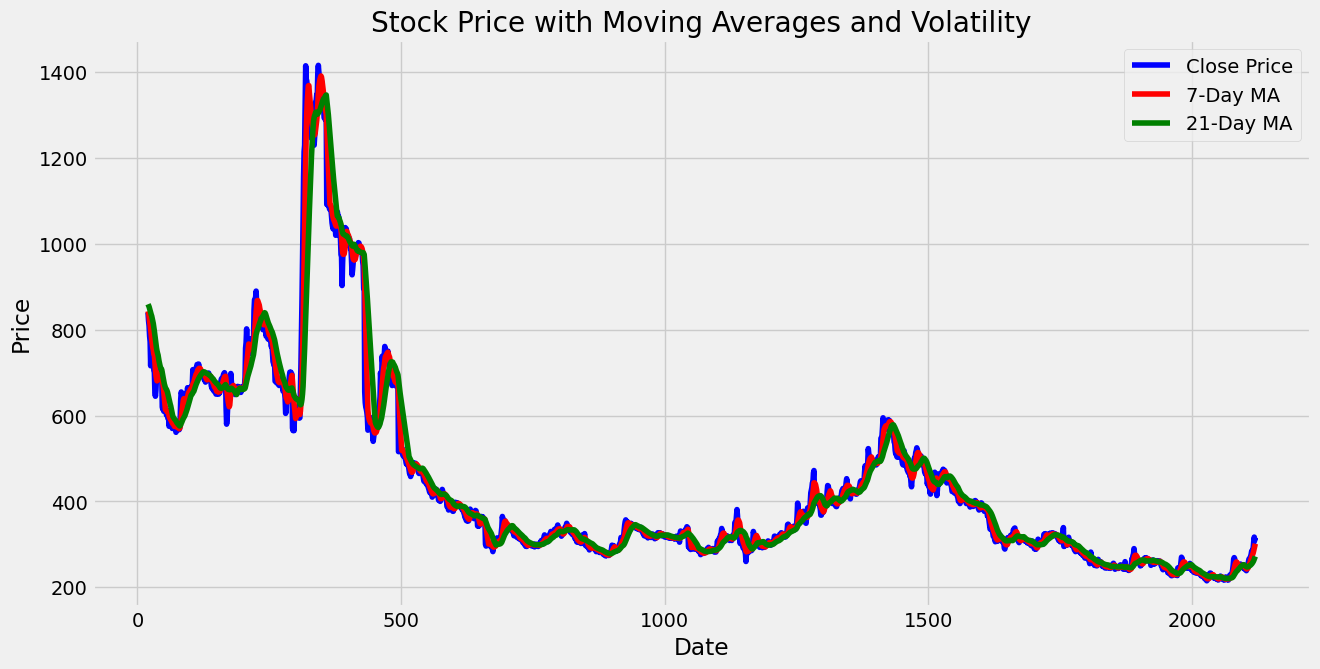

In [8]:

# Plotting the original 'Close' price and the new features

plt.figure(figsize=(14, 7))

# Plotting 'Close' price
plt.plot(df['Close'], label='Close Price', color = 'b')

# Plotting moving averages
plt.plot(df['MA7'], label='7-Day MA', color = 'r')
plt.plot(df['MA21'], label='21-Day MA', color = 'g')

# Adding titles and labels
plt.title('Stock Price with Moving Averages and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [9]:
df.describe()

,Close,High,Low,Open,Qty,Turnover,MA7,MA21,Volatility
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2.101000e+03,2101.000000,2101.000000,2101.000000
mean,441.412280,447.988063,435.354831,442.290205,45781.879581,1.998450e+07,442.166859,444.122635,10.529914
std,226.550934,229.841720,222.699672,226.129740,69937.658277,3.543659e+07,226.289836,225.149553,16.121762
min,215.000000,216.400000,212.200000,214.100000,45.000000,1.395000e+04,219.057143,220.676190,0.566947
25%,298.000000,302.000000,295.000000,299.000000,10016.000000,3.878339e+06,299.000000,300.714286,3.447912
50%,342.000000,345.000000,337.400000,343.000000,22753.000000,7.960330e+06,341.142857,338.714286,6.078847
75%,511.000000,521.000000,504.200000,514.000000,49809.000000,1.922214e+07,512.285714,525.419048,11.060440
max,1416.000000,1448.000000,1400.000000,1440.000000,901446.000000,4.262128e+08,1391.285714,1346.952381,185.419088


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101 entries, 20 to 2120
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2101 non-null   object 
 1   Close       2101 non-null   float64
 2   High        2101 non-null   float64
 3   Low         2101 non-null   float64
 4   Open        2101 non-null   float64
 5   Qty         2101 non-null   float64
 6   Turnover    2101 non-null   float64
 7   MA7         2101 non-null   float64
 8   MA21        2101 non-null   float64
 9   Volatility  2101 non-null   float64
dtypes: float64(9), object(1)
memory usage: 180.6+ KB


Text(0, 0.5, 'Close Price')

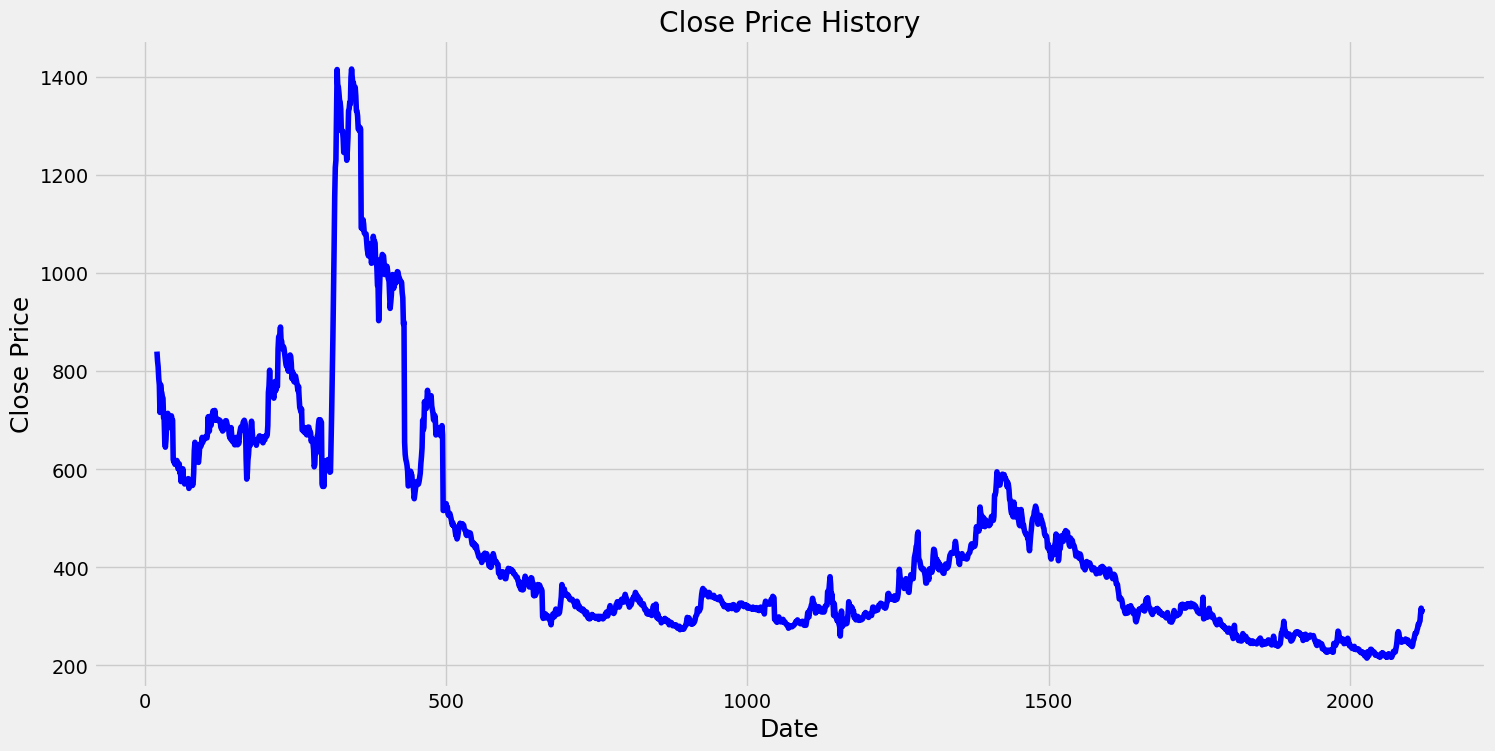

In [11]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'],color = 'b')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)


In [12]:
#create a new dataframe eith only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values

In [13]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.75)
training_data_len

1576

In [14]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.52039967],
       [0.50457952],
       [0.49458784],
       ...,
       [0.08484596],
       [0.07860117],
       [0.08368027]])

In [15]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.52039967, 0.50457952, 0.49458784, 0.4746045 , 0.46378018,
       0.41715237, 0.46461282, 0.45378851, 0.45045795, 0.44379684,
       0.44129892, 0.40799334, 0.40549542, 0.36636137, 0.35803497,
       0.37052456, 0.39550375, 0.4113239 , 0.41548709, 0.41215654,
       0.39550375, 0.39134055, 0.39550375, 0.40549542, 0.4113239 ,
       0.40466278, 0.40383014, 0.33721898, 0.33305579, 0.33388843,
       0.32889259, 0.32889259, 0.32889259, 0.33555371, 0.33305579,
       0.32139883, 0.32139883, 0.32972523, 0.31473772, 0.316403  ,
       0.29975021, 0.3122398 , 0.30641132, 0.32139883, 0.30141549,
       0.30474604, 0.29558701, 0.29641965, 0.29975021, 0.29975021,
       0.29975021, 0.30391341, 0.30474604, 0.28809326, 0.29392173,
       0.29975021, 0.29558701, 0.29725229, 0.29725229, 0.29308909])]
[0.29558701082431305]

[array([0.52039967, 0.50457952, 0.49458784, 0.4746045 , 0.46378018,
       0.41715237, 0.46461282, 0.45378851, 0.45045795, 0.44379684,
       0.44129892, 0.40799334, 0.40

In [16]:
#convert the x_train and y_tain to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1516, 60, 1)

In [17]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\UTI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0269
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0029
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0016
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0014
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0011
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.1386e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0010
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 7.3828e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6.2515e-04
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 7.5549e-04
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 7.5462e-04
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 6.0542e-04
Epoch 15/100
24/24 ━━━━━━━━━━━━━━

In [20]:
#create the testing data set
#ceate new array containing scaled value from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range( 60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [21]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [23]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [24]:
# Calculate the RMSE, MAE, R Squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate accuracy
accuracy = 100 - mape

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Accuracy: {accuracy}%')


Root Mean Squared Error (RMSE): 5.711813249227632
Mean Absolute Error (MAE): 4.21852019391741
R-squared: 0.9788727285194044
Mean Absolute Percentage Error (MAPE): 1.544802787786073
Accuracy: 98.45519721221393%


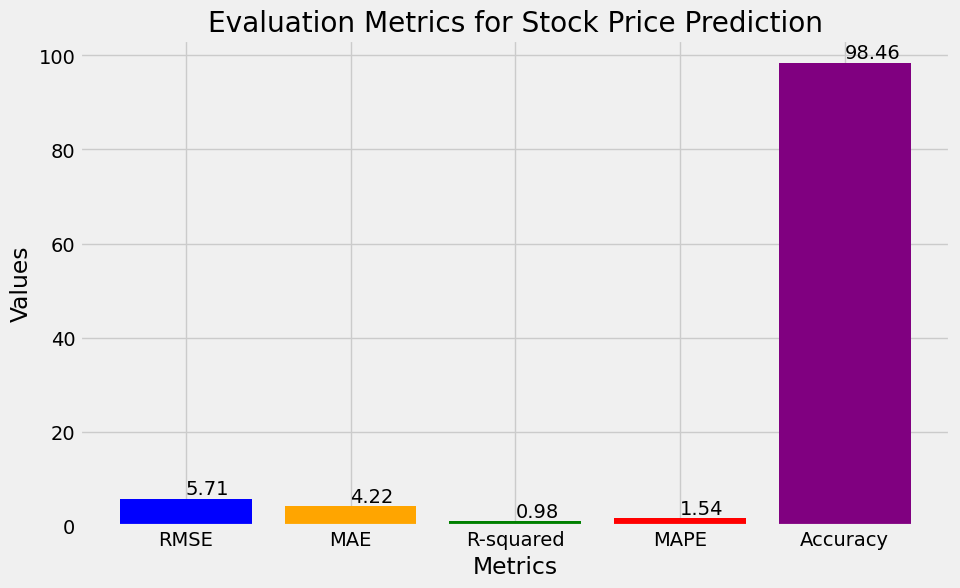

In [25]:

# Data for the bar graph
metrics = ['RMSE', 'MAE', 'R-squared', 'MAPE', 'Accuracy']
values = [rmse, mae, r2, mape, accuracy]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple'])

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom') 

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Stock Price Prediction')
plt.show()


C:\Users\UTI\AppData\Local\Temp\ipykernel_16220\3099735842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


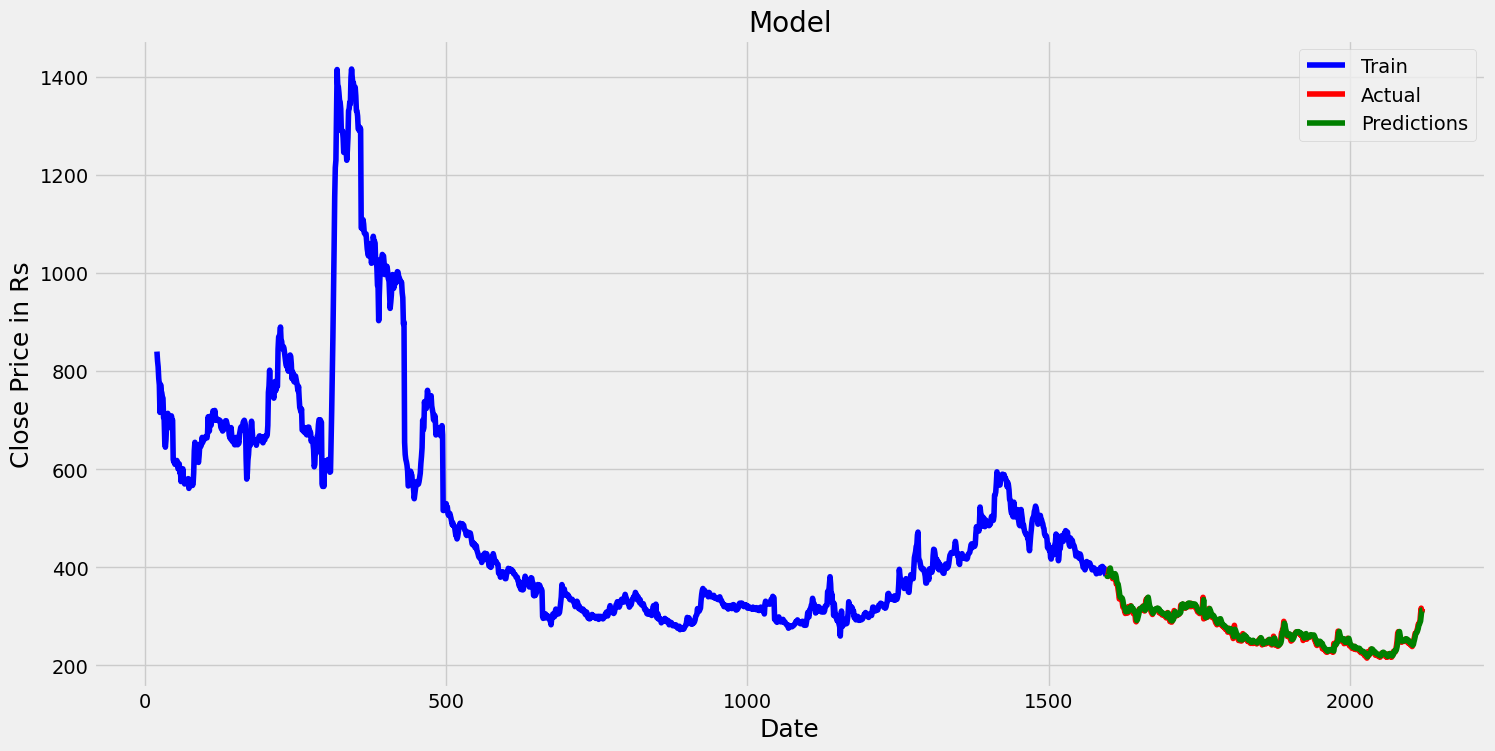

In [26]:
import matplotlib.pyplot as plt

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in Rs', fontsize = 18)

# Plot train data
plt.plot(train.index, train['Close'], label='Train', color = 'b')

# Plot actual and predicted data for validation
plt.plot(valid.index, valid['Close'], label='Actual', color = 'r')
plt.plot(valid.index, valid['Predictions'], label='Predictions', color = 'g')

plt.legend()
plt.show()


In [27]:
#show the valid and predicted prices
valid

,Close,Predictions
1596,380.0,385.104156
1597,381.0,381.707245
1598,382.0,381.720062
1599,389.0,383.027222
1600,396.6,388.697021
...,...,...
2116,290.9,287.456665
2117,306.0,290.657318
2118,316.9,301.132568
2119,309.4,313.253204


In [28]:
# Indices of interest
#indices_of_interest =list(range(4111, 4121))

# Filter the 'valid' DataFrame
#filtered_data = valid.loc[indices_of_interest, ['Close', 'Predictions']]

# Display the filtered data
#print(filtered_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

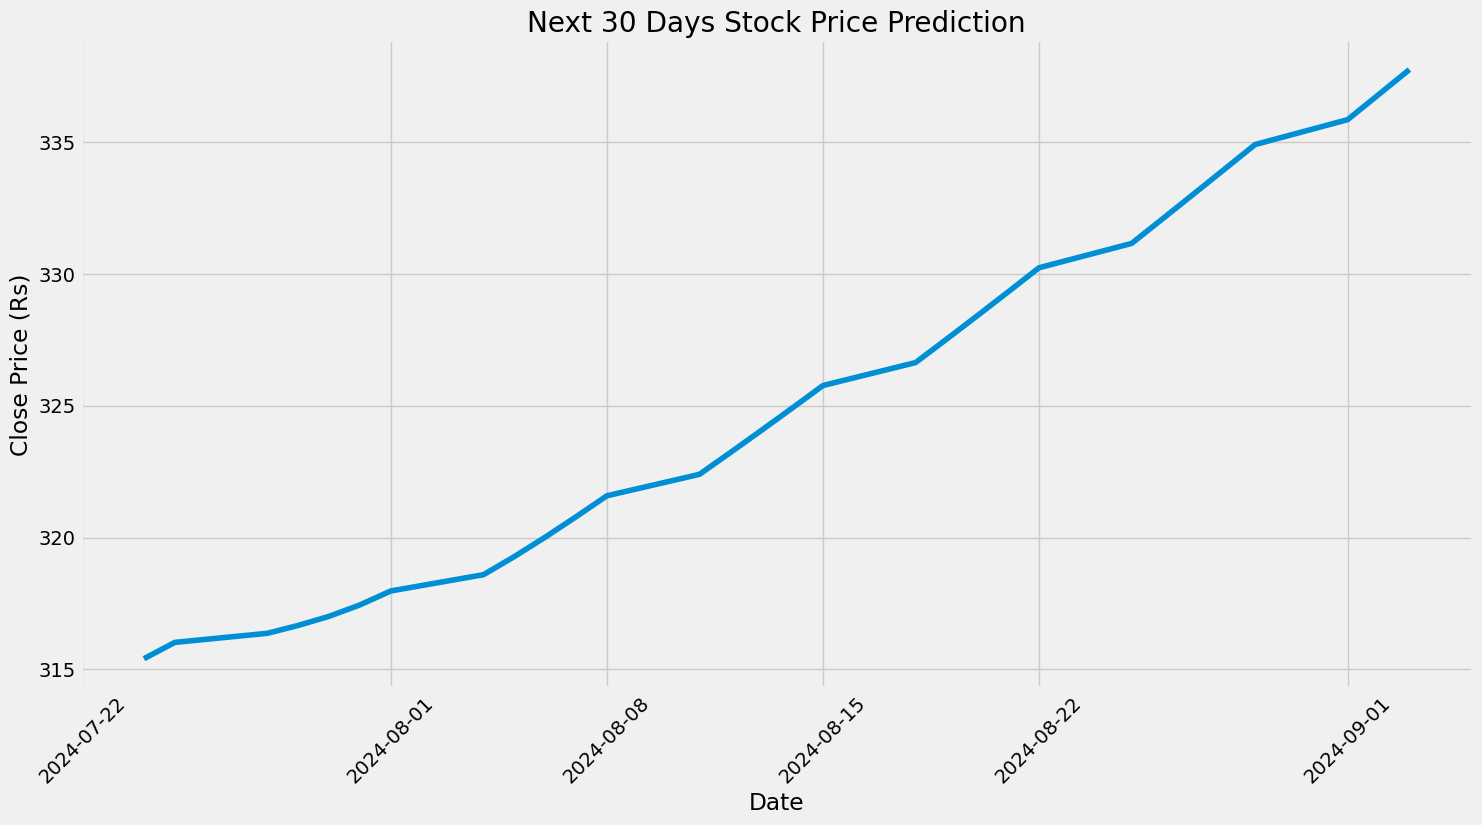

In [29]:
from datetime import datetime, timedelta  # Ensure timedelta is imported
stock = pd.read_csv("SBL.csv")
# Function to generate the next 30 business days
def get_next_30_business_days(start_date):
    business_days = []
    current_date = start_date
    while len(business_days) < 30:
        current_date += timedelta(days=1)
        if current_date.weekday() not in (4, 5):  # Skip Fridays (4) and Saturdays (5)
            business_days.append(current_date)
    return business_days

# Predicting the next 30 days
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_30_days = []
start_date = pd.to_datetime(stock['Date'].iloc[-1])
dates = get_next_30_business_days(start_date)

for _ in range(30):
    pred_price = model.predict(X_test)
    predicted_30_days.append(pred_price[0][0])
    new_input = np.append(X_test[0][1:], pred_price)
    new_input = np.reshape(new_input, (1, 60, 1))
    X_test = new_input

predicted_30_days = scaler.inverse_transform([predicted_30_days])[0]

# Show predicted prices in a table
predicted_df = pd.DataFrame({'Date': dates, 'Predicted Close': predicted_30_days})
print(predicted_df)

# Plot the predictions
plt.figure(figsize=(16,8))
plt.title('Next 30 Days Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (Rs)')
plt.plot(predicted_df['Date'], predicted_df['Predicted Close'])
plt.xticks(rotation=45)
plt.show()

